In [ ]:
!pip install seaborn

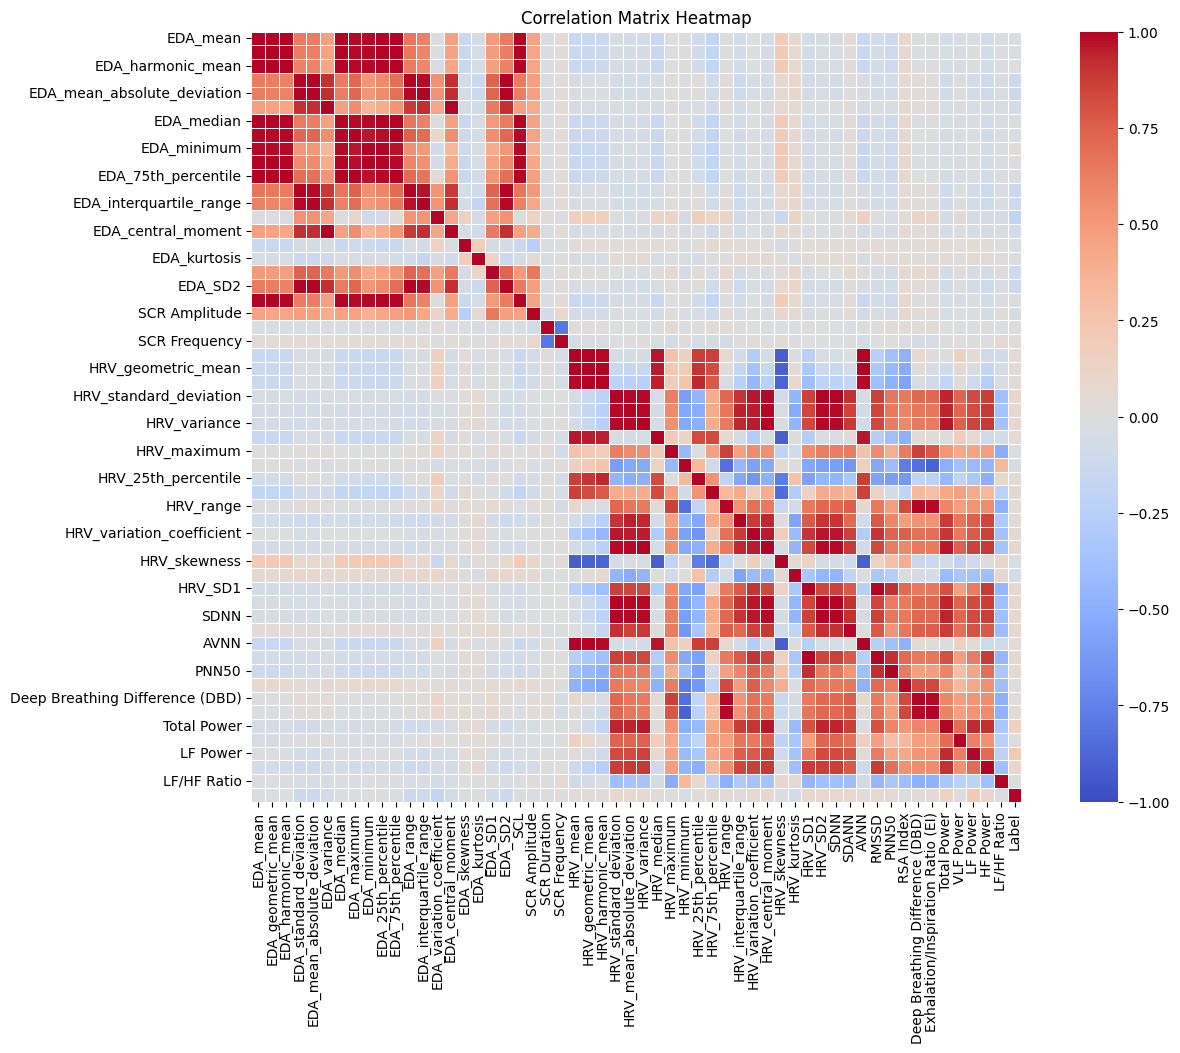

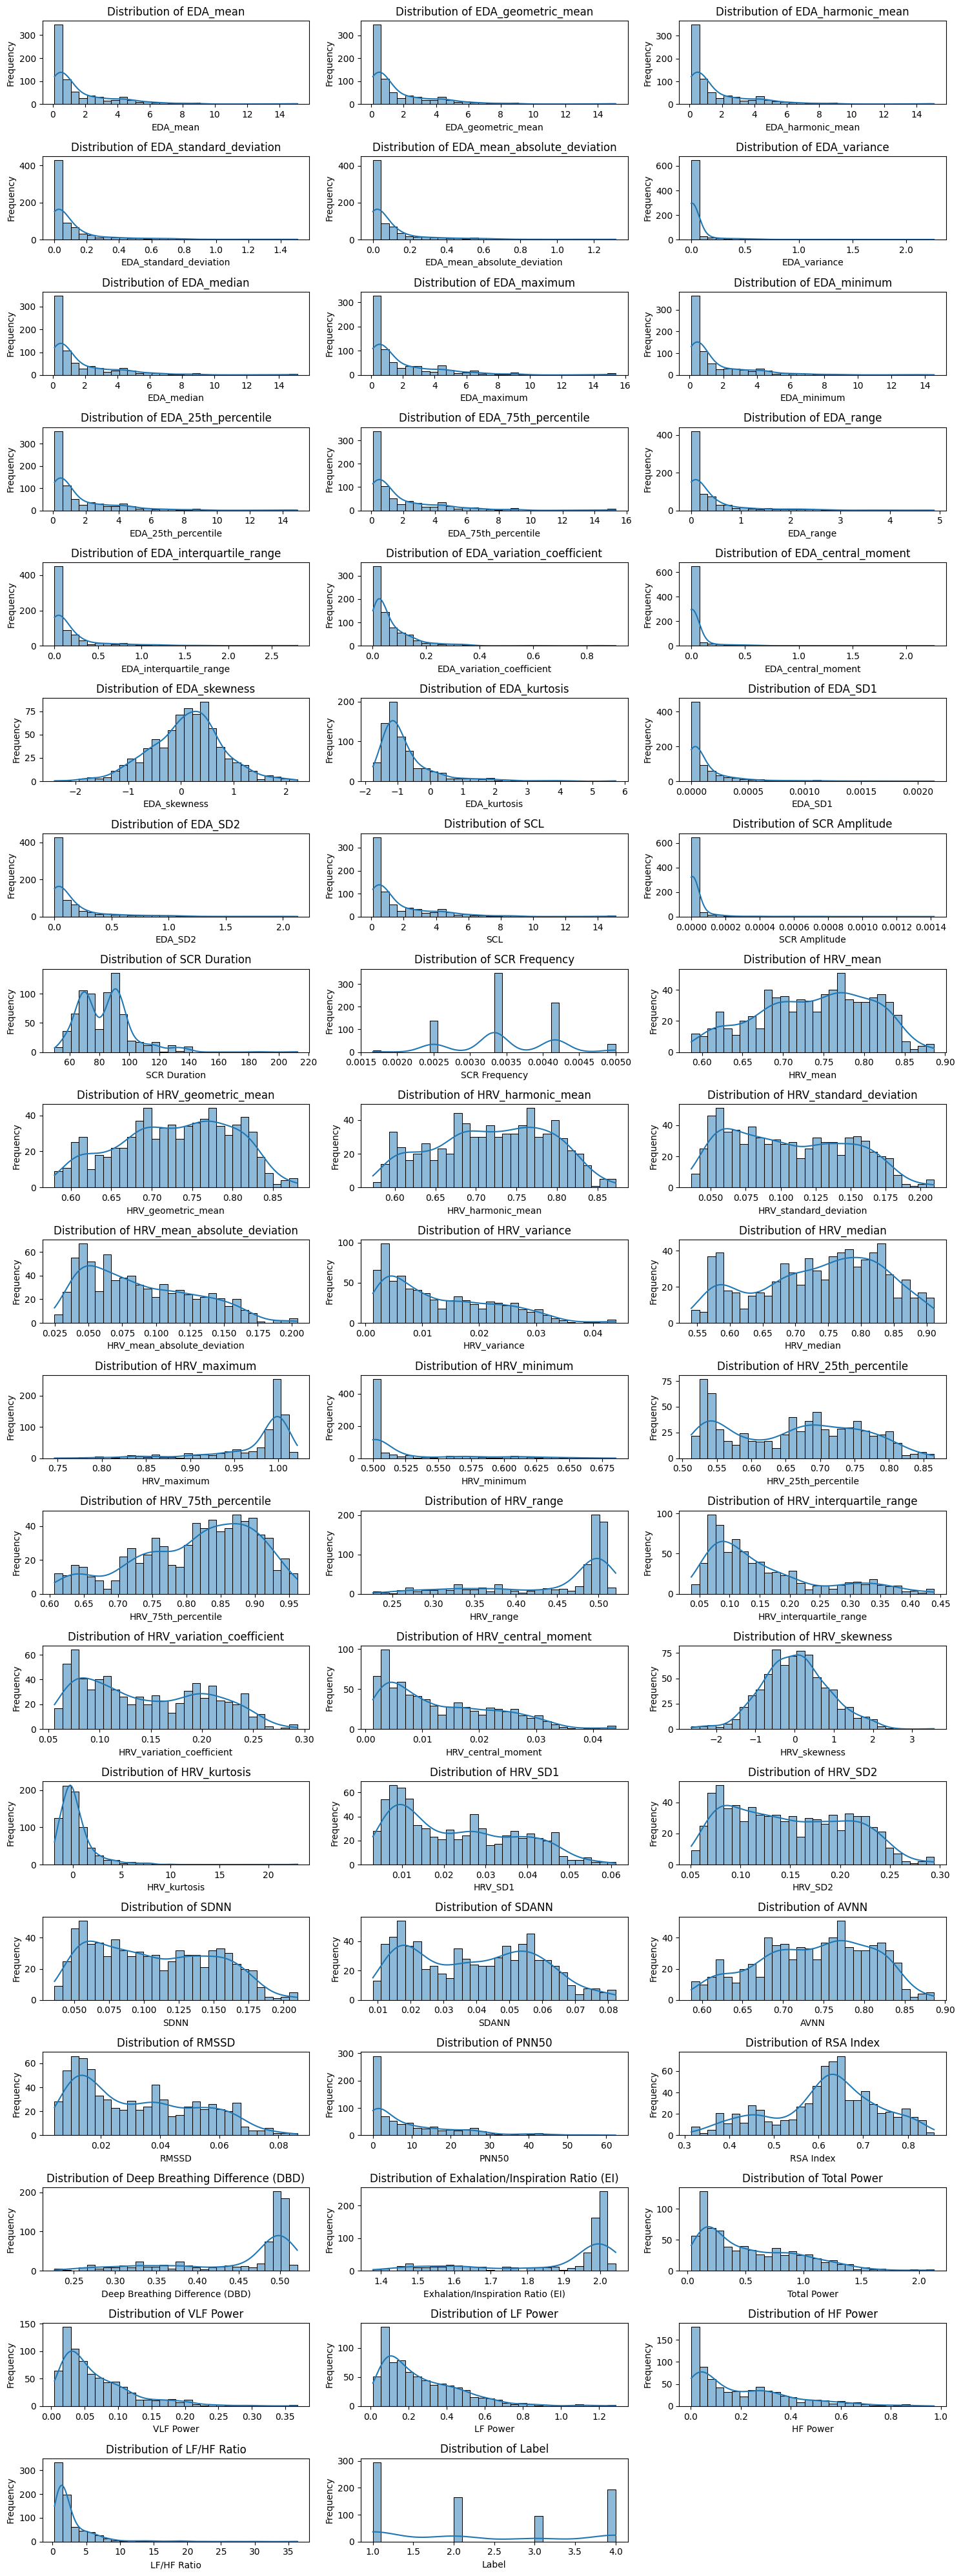

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\combined_features_dataset.csv"  
data = pd.read_csv(file_path)

# Select numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])
data_filtered = numeric_data[numeric_data['Label'] != 0]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', 
            vmin=-1, vmax=1, square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize distributions of the remaining features
plt.figure(figsize=(15, 40))
for i, column in enumerate(data_filtered.columns, 1):
    plt.subplot(len(data_filtered.columns) // 3 + 1, 3, i)  # Adjust subplot layout
    sns.histplot(data_filtered[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\elec2\AppData\Local\Temp\ipykernel_7300\3804426008.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


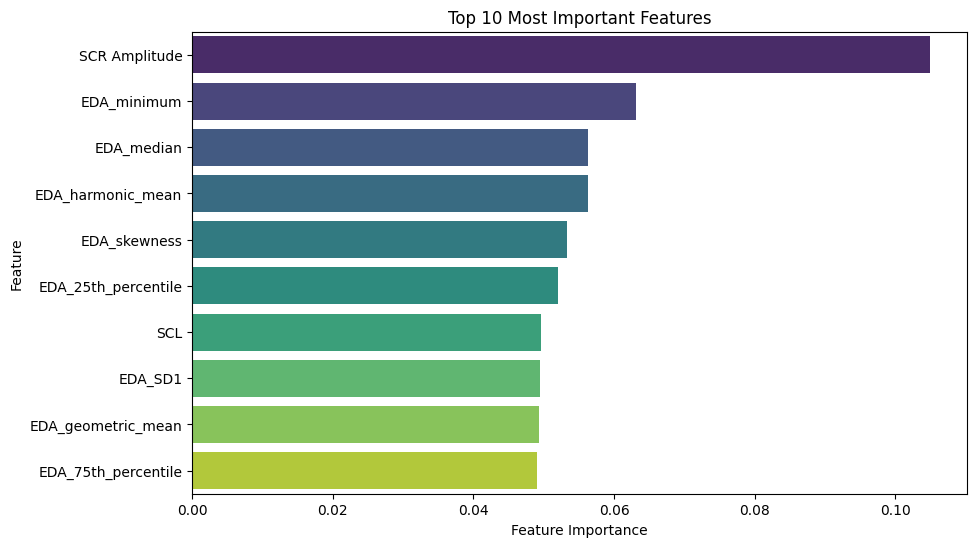

Plot saved as F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\top_10_feature_importance.png


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression tasks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\eda_features_only_dataset.csv"  
# file_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\combined_features_dataset.csv"
# file_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\core_features_dataset.csv"
data = pd.read_csv(file_path)

# Select numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data[numeric_data['Label'] != 0]

# Assuming 'Label' is the target column; replace with actual target column name if different
X = numeric_data.drop(columns=['Label'])
y = numeric_data['Label']

# Split data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForest model (classifier or regressor based on the target variable type)
model = RandomForestClassifier(random_state=42)  # Use RandomForestRegressor for regression
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Get the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Plotting the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')


# Save the plot to a file
output_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\top_10_feature_importance.png"
plt.savefig(output_path, format='png', bbox_inches='tight')
plt.show()

print(f"Plot saved as {output_path}")

plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Read the CSV file
# file_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\eda_features_only_dataset.csv"  
file_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\combined_features_dataset.csv"
# file_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\core_features_dataset.csv"
data = pd.read_csv(file_path)


# Drop rows where 'Label' is 0
data_filtered = data[data['Label'] != 0].reset_index(drop=True)

# Keep only numeric columns for feature selection
X_filtered = data_filtered.select_dtypes(include=[np.number]).drop(columns=['Label'])
y_filtered = data_filtered['Label']

# Step 1: Drop highly correlated features
correlation_matrix = X_filtered.corr().abs()  # Compute the absolute correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))  # Upper triangle of the correlation matrix

# Find features with high correlation
correlation_threshold = 0.9  # Define the threshold for high correlation
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Drop highly correlated features from the dataset
X_filtered_dedup = X_filtered.drop(columns=high_corr_features)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered_dedup, y_filtered, test_size=0.3, random_state=42)

# Step 3: Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Use SelectFromModel to find top 10 features
selector = SelectFromModel(model, threshold=-np.inf, max_features=10, prefit=True)
selected_features = selector.get_support(indices=True)

# Step 5: Create a new DataFrame with the top 10 features and the 'Label' column
top_10_features_df = X_filtered_dedup.iloc[:, selected_features].copy()
top_10_features_df['Label'] = y_filtered.values  # Align 'Label' to match the filtered data

# Step 6: Save the new dataset with top 10 features to a CSV file
output_path = r"F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\top_10_allfeatures_dataset.csv"
top_10_features_df.to_csv(output_path, index=False)

print(f"New CSV file created with top 10 features: {output_path}")


New CSV file created with top 10 features: F:\Studies\PainStudies Lab\Stress Assessment\WESAD Dataset\WESAD\top_10_allfeatures_dataset.csv
